In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


    



In [113]:
#데이터 불러오기
df=pd.read_csv('D:/GC/train.csv')

In [114]:
df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [115]:
df.columns


Index(['일시', '최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율',
       '평균기온'],
      dtype='object')

In [116]:
#결측치 확인
df.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [117]:
avg=df['최고기온'].mean()
df['최고기온']=df['최고기온'].fillna(avg)
avg=df['최저기온'].mean()
df['최저기온']=df['최저기온'].fillna(avg)
avg=df['일교차'].mean()
df['일교차']=df['일교차'].fillna(avg)
avg=df['강수량'].mean()
df['강수량']=df['강수량'].fillna(avg)
avg=df['평균풍속'].mean()
df['평균풍속']=df['평균풍속'].fillna(avg)
avg=df['일조합'].mean()
df['일조합']=df['일조합'].fillna(avg)
avg=df['일사합'].mean()
df['일사합']=df['일사합'].fillna(avg)
avg=df['일조율'].mean()
df['일조율']=df['일조율'].fillna(avg)

df.isnull().sum()

일시      0
최고기온    0
최저기온    0
일교차     0
강수량     0
평균습도    0
평균풍속    0
일조합     0
일사합     0
일조율     0
평균기온    0
dtype: int64

In [118]:
#데이터 그룹화를 위한 년도 구분, 년도 추출후 일시 삭제
df['일시'] = pd.to_datetime(df['일시'])
df['년도'] = df['일시'].dt.year // 10 * 10
df.drop('일시',axis=1,inplace=True)

In [119]:
df

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,년도
0,2.2,-5.2,7.4,9.593683,68.3,1.7,6.7,11.93317,48.653526,-1.6,1960
1,1.2,-5.6,6.8,0.400000,87.7,1.3,0.0,11.93317,48.653526,-1.9,1960
2,8.7,-2.1,10.8,0.000000,81.3,3.0,0.0,11.93317,48.653526,4.0,1960
3,10.8,1.2,9.6,0.000000,79.7,4.4,2.6,11.93317,48.653526,7.5,1960
4,1.3,-8.2,9.5,9.593683,44.0,5.1,8.2,11.93317,48.653526,-4.6,1960
...,...,...,...,...,...,...,...,...,...,...,...
23006,3.3,-7.3,10.6,9.593683,69.8,1.8,8.8,10.25000,91.700000,-2.6,2020
23007,0.1,-6.0,6.1,0.100000,58.1,2.5,8.7,10.86000,90.600000,-3.3,2020
23008,2.1,-7.8,9.9,0.000000,56.3,1.7,9.0,10.88000,93.800000,-2.9,2020
23009,2.3,-4.4,6.7,0.000000,65.6,1.9,7.9,10.84000,82.300000,-1.8,2020


C:\anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


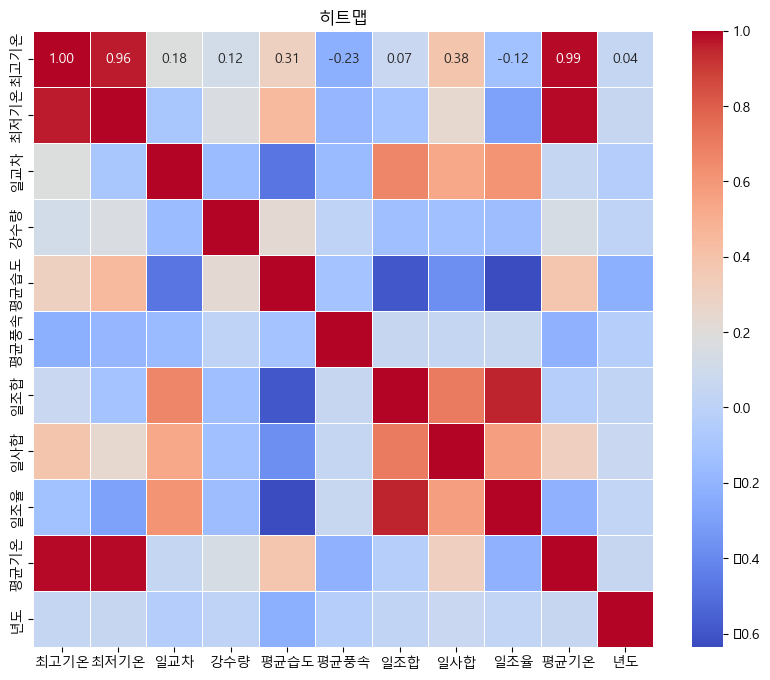

In [120]:
#상관도를 확인하기위한 히트맵
corr_matrix = df.corr()  
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('히트맵')
plt.show()

In [121]:
sns.pairplot(df, diag_kind='kde'
plt.show()

SyntaxError: '(' was never closed (2988466099.py, line 1)

In [ ]:
# 스캐터 플롯 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x='년도', y='일조합', data=df, label='일조합')

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='년도', y='일사합', data=df, label='일사합')

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='년도', y='일조율', data=df, label='일조율')

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


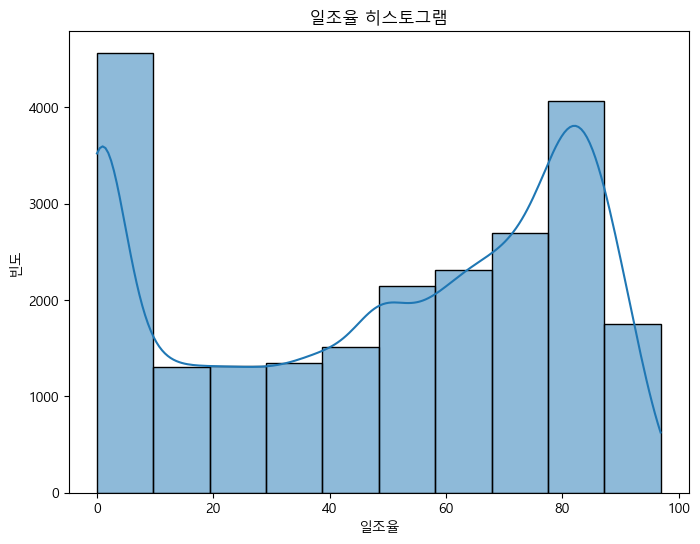

In [122]:
#히스토그램 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['일조율'], bins=10, kde=True)  
plt.title('일조율 히스토그램')
plt.xlabel('일조율')
plt.ylabel('빈도')
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


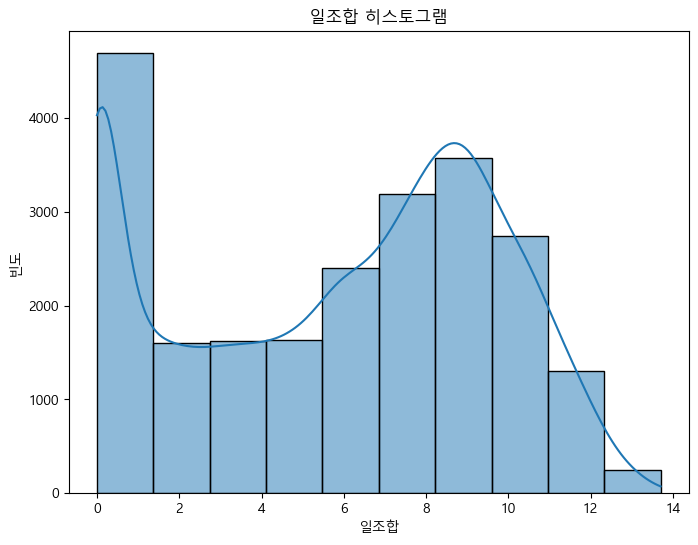

In [123]:
plt.figure(figsize=(8, 6))
sns.histplot(df['일조합'], bins=10, kde=True)  
plt.title('일조합 히스토그램')
plt.xlabel('일조합')
plt.ylabel('빈도')
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


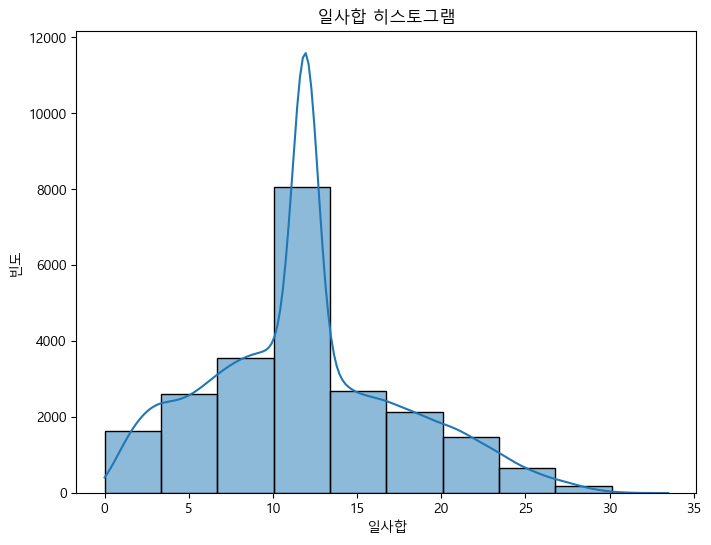

In [124]:
plt.figure(figsize=(8, 6))
sns.histplot(df['일사합'], bins=10, kde=True) 
plt.title('일사합 히스토그램')
plt.xlabel('일사합')
plt.ylabel('빈도')
plt.show()

In [125]:
#년도 기준 그룹화
grouped_df=df.groupby('년도').mean()
grouped_df

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
년도,,,,,,,,,,
1960,16.525861,7.613045,8.912817,9.487751,69.142458,2.401314,5.976294,11.933170,48.628549,11.721927
1970,16.734384,8.038404,8.695980,9.184483,69.335789,2.451396,5.500936,11.697966,45.825301,11.947043
1980,16.541719,7.879907,8.661812,9.262146,66.622228,2.498736,6.062880,11.669437,50.404024,11.870025
1990,17.384803,8.797180,8.587623,10.166275,65.300055,2.258680,5.938609,10.924359,49.408981,12.800657
2000,17.238900,9.146126,8.092773,9.952178,61.731782,2.254613,4.985480,12.055499,41.895675,12.911142
2010,17.682659,8.951068,8.731687,9.449323,59.315471,2.431364,6.587746,12.623408,54.733844,12.934474
2020,18.145347,9.405704,8.729306,9.793494,64.432482,2.347172,6.195910,14.249732,52.072810,13.439872


In [126]:
#그룹화된 데이터를 기준으로 회귀 학습
X = grouped_df[['일조합', '일사합']]
y = grouped_df['일조율']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.7057726063126343
R-squared: 0.6407459117361007


In [127]:
# 임의의 일조합,일사합 삽입시 일조율 예측
data_2030 = {'일조합': [6], '일사합': [12]}  
df_2030 = pd.DataFrame(data_2030)

# 2030년의 일조율 예측
predicted_2030 = model.predict(df_2030)

print(f'2030년의 예측 일조율: {predicted_2030[0]:.2f}')


2030년의 예측 일조율: 50.01
